**Data Cleaning , Processing and Data analysis for Melbourne Housing Dataset**

In [365]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.stats import mstats


In [366]:
#Reading the csv data file 
mel_housing_df = pd.read_csv(r'C:\Users\DELL\OneDrive\Documents\GitHub\HEM-Housing-ML-Model\Datasets\Melbourne_housing_FULL.csv')
mel_housing_df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [367]:
# Reading the schooling facilities per region csv data file
schools_per_region = pd.read_csv(r'C:\Users\DELL\OneDrive\Documents\GitHub\HEM-Housing-ML-Model\clean-datasets\region_school_data.csv') 
schools_per_region

,Regionname,Total_Schools_per_Region
0,Eastern Metropolitan,202
1,Eastern Victoria,95
2,Northern Metropolitan,239
3,Northern Victoria,36
4,South-Eastern Metropolitan,185
5,Southern Metropolitan,191
6,Western Metropolitan,229
7,Western Victoria,21


In [368]:
# Ensuring 'Regionname' is consistent across both datasets 
mel_housing_df['Regionname'] = mel_housing_df['Regionname'].str.strip().str.lower()
schools_per_region['Regionname'] = schools_per_region['Regionname'].str.strip().str.lower()
#Check for exitence of any regions in the housing dataset that do not have a corresponding entry in the school dataset
missing_regions = mel_housing_df[~mel_housing_df['Regionname'].isin(schools_per_region['Regionname'])]['Regionname'].unique()
if len(missing_regions) > 0:
    print("Regions in housing data not found in schools data:", missing_regions)

#Checking for duplicate entries in the 'Regionname' column in both datasets
duplicate_housing_regions = mel_housing_df[mel_housing_df.duplicated(subset='Regionname', keep=False)]
duplicate_school_regions = schools_per_region[schools_per_region.duplicated(subset='Regionname', keep=False)]
#Merging the datasets on 'Regionname'
mel_housing_df = pd.merge(mel_housing_df, schools_per_region, on='Regionname', how='left')
# Renaming the column to 'Schooling_Facilities' for clarity
mel_housing_df = mel_housing_df.rename(columns={'Total_Schools_per_Region': 'Schooling_Facilities'})
#Verifying if the values were allocated correctly after merging

regions_to_check = ['eastern victoria', 'western victoria', 'northern victoria']
filtered_df = mel_housing_df[mel_housing_df['Regionname'].isin(regions_to_check)]
filtered_df[['Regionname', 'Schooling_Facilities']]



Regions in housing data not found in schools data: [nan]


,Regionname,Schooling_Facilities
14263,eastern victoria,95.0
14313,eastern victoria,95.0
14337,northern victoria,36.0
14345,northern victoria,36.0
14357,eastern victoria,95.0
...,...,...
34540,eastern victoria,95.0
34541,eastern victoria,95.0
34542,eastern victoria,95.0
34543,eastern victoria,95.0


In [369]:
mel_housing_df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Schooling_Facilities
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,northern metropolitan,4019.0,239.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,northern metropolitan,4019.0,239.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,northern metropolitan,4019.0,239.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,northern metropolitan,4019.0,239.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,northern metropolitan,4019.0,239.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,western metropolitan,6543.0,229.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,western metropolitan,6543.0,229.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,western metropolitan,6543.0,229.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,western metropolitan,6543.0,229.0


In [370]:
# Exploring about our dataset 

print(f"Number of rows in the dataset: {mel_housing_df.shape[0]}")
print(f"Number of columns in the dataset: {mel_housing_df.shape[1]}\n")
mel_housing_df.info()


Number of rows in the dataset: 34857
Number of columns in the dataset: 22

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Suburb                34857 non-null  object 
 1   Address               34857 non-null  object 
 2   Rooms                 34857 non-null  int64  
 3   Type                  34857 non-null  object 
 4   Price                 27247 non-null  float64
 5   Method                34857 non-null  object 
 6   SellerG               34857 non-null  object 
 7   Date                  34857 non-null  object 
 8   Distance              34856 non-null  float64
 9   Postcode              34856 non-null  float64
 10  Bedroom2              26640 non-null  float64
 11  Bathroom              26631 non-null  float64
 12  Car                   26129 non-null  float64
 13  Landsize              23047 non-null  float64


It can be observed that the dataset as a whole consists of 21 columns with both numerical and categorical features . Moreover there are columns like **'BuildingArea'** and **'YearBuilt'** for which missing values have to be handled but theese columns almost half of the values are null, therefore its best to get rid of them in the beginning .  The dataset also contains categorical features like 'Regionname' and 'Type' which can be encoded


Since the model for which the data is being analysed predicts the housing prices on the basis of Region name therefore its good to drop columns like Suburb, CouncilArea,Postcode 

In [371]:
# Dropping columns with more than half of total null values 
mel_housing_df.drop(columns=['YearBuilt','BuildingArea'],inplace = True)
#Further dropping of columns that are not recquired 
mel_housing_df.drop(columns = ["Suburb","Address", "Method", "SellerG", "Lattitude" , "Longtitude", "CouncilArea","Date"], inplace = True )
# Renanming columns
mel_housing_df = mel_housing_df.rename(columns={"Distance": "Distance_from_CBD" ,"Car" : "Car_Spot", "Regionname":"Region","Propertycount":"Property_Count" })

mel_housing_df.shape

(34857, 12)

In [372]:
#Dealing with duplicate rows if they exust in the dataset 

# Check for duplicate rows
num_duplicates = mel_housing_df.duplicated().sum()

if num_duplicates > 0:
    print(f"{num_duplicates} duplicate rows have been removed from mel_housing_df")
    # Dropping duplicate rows
    mel_housing_df = mel_housing_df.drop_duplicates()
else:
    print("No duplicate rows found in mel_housing_df")


1291 duplicate rows have been removed from mel_housing_df


*Handling Missing Values and Data Types of Features*

In [373]:
#Identifying missing data 
mel_housing_df.isna().sum()

Rooms                       0
Type                        0
Price                    6575
Distance_from_CBD           1
Postcode                    1
Bedroom2                 7300
Bathroom                 7309
Car_Spot                 7807
Landsize                10767
Region                      3
Property_Count              3
Schooling_Facilities        3
dtype: int64

In [374]:
#dropping all rows where the 'Price' and 'Region' is null 
mel_housing_df= mel_housing_df.dropna(subset=['Price','Region'])

In [375]:
# Filling missing values for 'Bathroom' with the median of each 'Region'
mel_housing_df['Bathroom'] = mel_housing_df.groupby('Region')['Bathroom'].transform(lambda x: x.fillna(x.median()))

# Filling missing values for 'Car_Spot' with the median of each 'Region'
mel_housing_df['Car_Spot'] = mel_housing_df.groupby('Region')['Car_Spot'].transform(lambda x: x.fillna(x.median()))

# Checking for any remaining missing values after group-based fill for 'Bathroom' and 'Car_Spot'
remaining_missing = mel_housing_df[['Bathroom', 'Car_Spot']].isna().sum()
print("Remaining missing values after group-based fill:\n", remaining_missing)

# Filling any remaining missing values for 'Bathroom' with the overall median
mel_housing_df['Bathroom'].fillna(mel_housing_df['Bathroom'].median(), inplace=True)

# Filling any remaining missing values for 'Car_Spot' with the overall median
mel_housing_df['Car_Spot'].fillna(mel_housing_df['Car_Spot'].median(), inplace=True)

# Filling missing values for 'Distance_from_CBD' and 'Postcode' with overall median
mel_housing_df['Distance_from_CBD'].fillna(mel_housing_df['Distance_from_CBD'].median(), inplace=True)
mel_housing_df['Postcode'].fillna(mel_housing_df['Postcode'].median(), inplace=True)

# Checking again for any remaining missing values
final_missing_values_count = mel_housing_df.isna().sum()
print("Final missing values count after overall median fill:\n", final_missing_values_count)


Remaining missing values after group-based fill:
 Bathroom    0
Car_Spot    0
dtype: int64
Final missing values count after overall median fill:
 Rooms                      0
Type                       0
Price                      0
Distance_from_CBD          0
Postcode                   0
Bedroom2                6272
Bathroom                   0
Car_Spot                   0
Landsize                9072
Region                     0
Property_Count             0
Schooling_Facilities       0
dtype: int64


**Elementary Data Analaysis** to recognize and learn patterns in order to deal with columns that still posses missing values 

Before moving forward, here are a few assumptions:

1. **Landsize and Price Correlation**: It's expected that larger land size leads to higher house prices, possibly in a linear fashion.
2. **Rooms, Bathrooms, and Carpark Correlation**: Larger houses with more rooms, bathrooms, and parking spaces are likely to have higher prices.
3. **CBD Proximity**: In Australia, properties closer to the Central Business District (CBD) tend to be more valuable due to convenience, amenities, and proximity to work, as many offices are located in the CBD.
4. **Schooling_Fcilities**: The property prices are higher for regions with higher schooling facilitites 

*Numerical Data Correlation Matrix* 

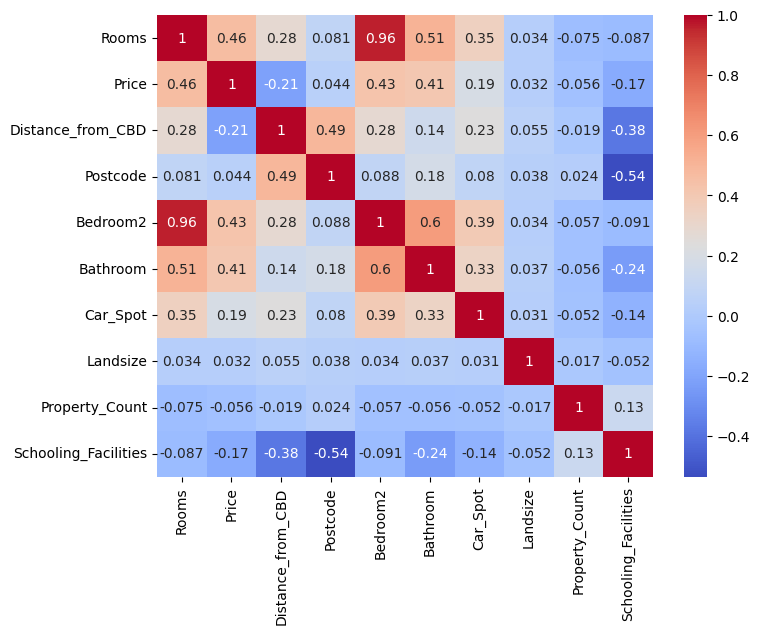

In [376]:
# Selecting only numeric columns
numeric_df = mel_housing_df.select_dtypes(include=[float, int])

# Calculate and plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.savefig(r'C:\Users\DELL\OneDrive\Documents\GitHub\HEM-Housing-ML-Model\images\features_heatmap.jpg')

Based on the heatmap, the number of **rooms**, **bedrooms**, and **bathrooms** is positively correlated with **house price**, indicating that larger houses tend to cost more. Since **rooms** and **bedrooms** are highly correlated, dropping the **bedrooms** variable during modeling can prevent redundancy and multicollinearity. Additionally, **PropertyCount**, **Postcode** and **Landsize** have a weak correlation with other variables, meaning it provides little predictive power and can be excluded from the model. 

In [377]:
# Dropping the 'Bedroom2' and 'Propertycount' columns based on observatioons of heatmap 
mel_housing_df = mel_housing_df.drop(columns=['Bedroom2', 'Property_Count','Landsize','Postcode'])

# Verifying the changes
mel_housing_df.head()


,Rooms,Type,Price,Distance_from_CBD,Bathroom,Car_Spot,Region,Schooling_Facilities
1,2,h,1480000.0,2.5,1.0,1.0,northern metropolitan,239.0
2,2,h,1035000.0,2.5,1.0,0.0,northern metropolitan,239.0
4,3,h,1465000.0,2.5,2.0,0.0,northern metropolitan,239.0
5,3,h,850000.0,2.5,2.0,1.0,northern metropolitan,239.0
6,4,h,1600000.0,2.5,1.0,2.0,northern metropolitan,239.0


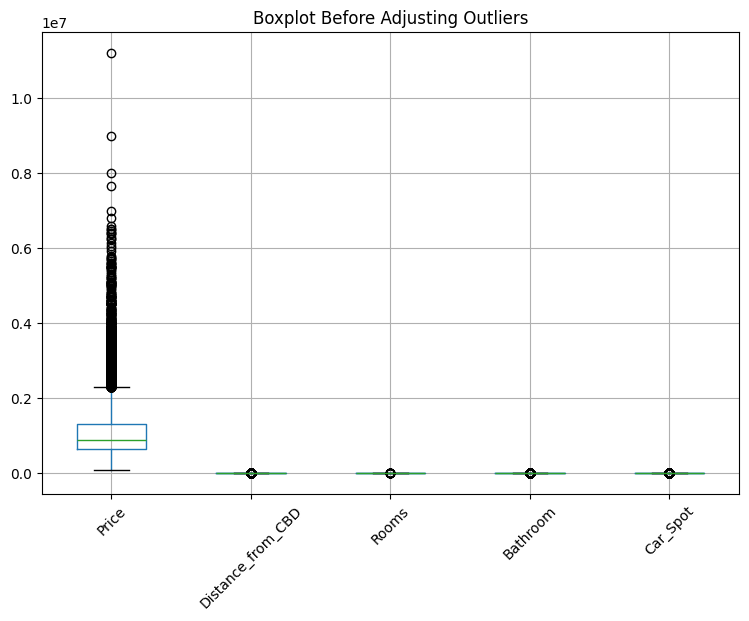

In [378]:
# Selecting specific numerical columns for outlier adjustment
numerical_columns = ['Price', 'Distance_from_CBD', 'Rooms', 'Bathroom', 'Car_Spot']

# Visualizing data using box plots before handling outliers
plt.figure(figsize=(9,6))
mel_housing_df[numerical_columns].boxplot()
plt.title('Boxplot Before Adjusting Outliers')
plt.xticks(rotation=45)
plt.show()


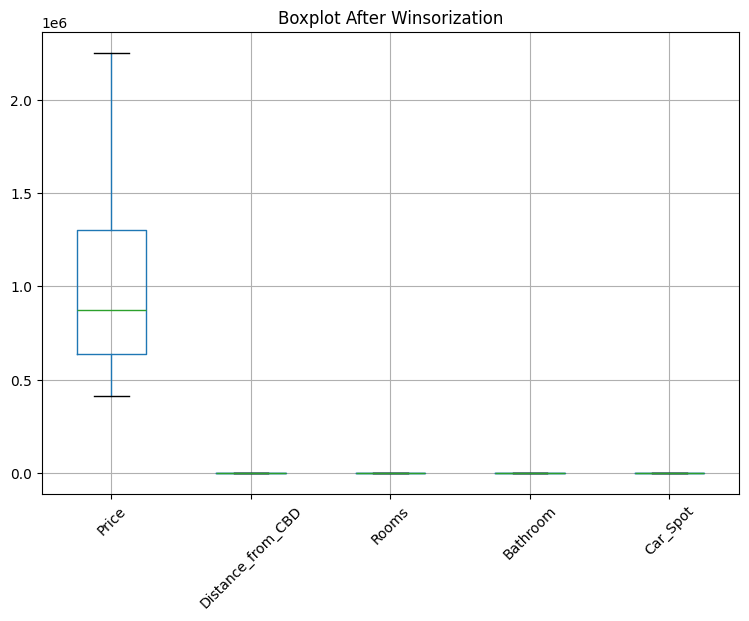

In [379]:
# Winsorization for outlier adjustment using the scipy.stats.mstats.winsorize function
# List of columns for Winsorization
numerical_columns = ['Price', 'Distance_from_CBD', 'Rooms', 'Bathroom', 'Car_Spot']

# Applying Winsorization to each numerical column
for column in numerical_columns:
    mel_housing_df[column] = mstats.winsorize(mel_housing_df[column], limits=[0.05, 0.05])
    
# Visualizing adjusted data using box plots after Winsorization
import matplotlib.pyplot as plt

plt.figure(figsize=(9,6))
mel_housing_df[numerical_columns].boxplot()
plt.title('Boxplot After Winsorization')
plt.xticks(rotation=45)
plt.show()

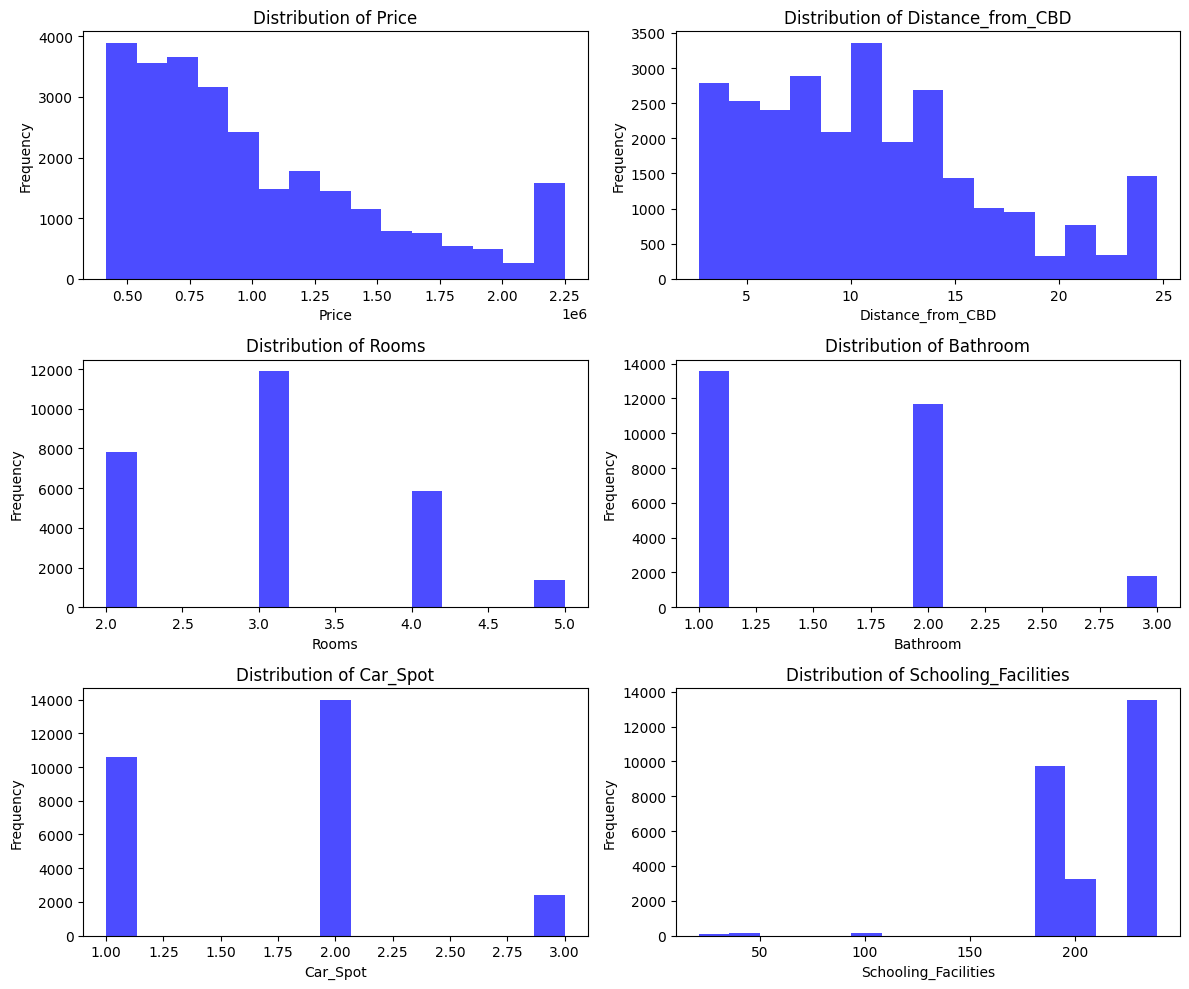

In [381]:
# Columns to plot from the dataset
columns_to_plot = ['Price', 'Distance_from_CBD', 'Rooms', 'Bathroom', 'Car_Spot', 'Schooling_Facilities']
plt.figure(figsize=(12, 10))
for idx, column in enumerate(columns_to_plot):
    plt.subplot(3, 2, idx+1) 
    plt.hist(mel_housing_df[column], bins=15, alpha=0.7, color='b')  
    plt.title(f'Distribution of {column}')  
    plt.xlabel(column) 
    plt.ylabel('Frequency')  
plt.tight_layout()
plt.show()


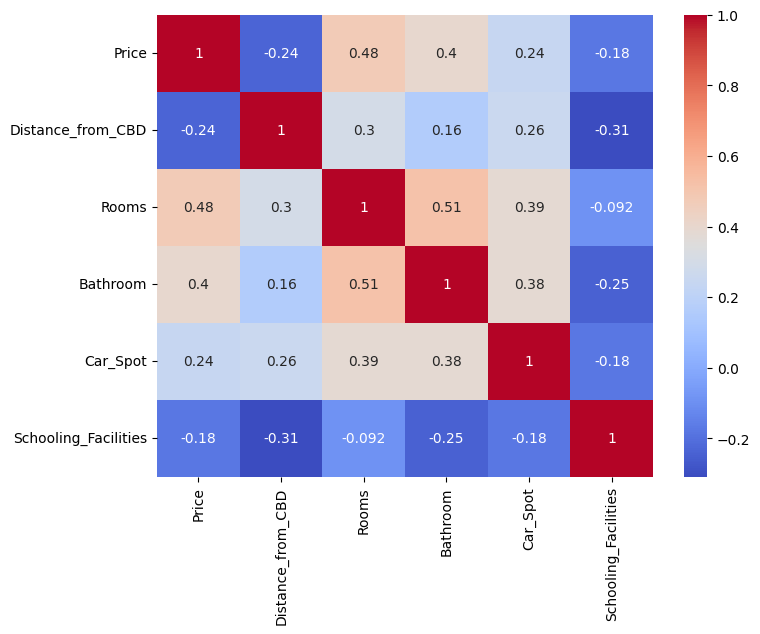

In [382]:
# Calculate and plot heatmap for the finalized features 
plt.figure(figsize=(8,6))
sns.heatmap(mel_housing_df[columns_to_plot].corr(), annot=True, cmap='coolwarm')
plt.savefig(r'C:\Users\DELL\OneDrive\Documents\GitHub\HEM-Housing-ML-Model\images\final_features_heatmap.jpg')

In [383]:
'''# Enumerating and encoding the 'Type' column
type_encoder = LabelEncoder().fit(mel_housing_df['Type'])
type_mapping = {x: i for i, x in enumerate(type_encoder.classes_)}
mel_housing_df['Type'] = LabelEncoder().fit_transform(mel_housing_df['Type'])

# Enumerating and encoding the 'Region' column
region_encoder = LabelEncoder().fit(mel_housing_df['Region'])
region_mapping = {x: i for i, x in enumerate(region_encoder.classes_)}
mel_housing_df['Region'] = LabelEncoder().fit_transform(mel_housing_df['Region'])
mel_housing_df = pd.concat([mel_housing_df[['Type', 'Region']], mel_housing_df[['Price', 'Distance_from_CBD', 'Rooms', 'Bathroom', 'Car_Spot', 'Schooling_Facilities']]], axis=1)
print("Type Mapping:", type_mapping)
print("Region Mapping:", region_mapping)
mel_housing_df.head()
'''
mel_housing_df.head()

,Rooms,Type,Price,Distance_from_CBD,Bathroom,Car_Spot,Region,Schooling_Facilities
1,2,h,1480000.0,2.7,1.0,1.0,northern metropolitan,239.0
2,2,h,1035000.0,2.7,1.0,1.0,northern metropolitan,239.0
4,3,h,1465000.0,2.7,2.0,1.0,northern metropolitan,239.0
5,3,h,850000.0,2.7,2.0,1.0,northern metropolitan,239.0
6,4,h,1600000.0,2.7,1.0,2.0,northern metropolitan,239.0


In [384]:
# Saving the final dataset as a CSV file
mel_housing_df.to_csv(r'C:\Users\DELL\OneDrive\Documents\GitHub\HEM-Housing-ML-Model\clean-datasets\mel-housing-data-cleaned.csv', index=False)

Performing **EDA** to get an understanding on the relat

In [385]:
# Generating descriptive statistics
print("Descriptive statistics for the cleaned dataset:")
mel_housing_df.describe()


Descriptive statistics for the cleaned dataset:


,Rooms,Price,Distance_from_CBD,Bathroom,Car_Spot,Schooling_Facilities
count,26988.000000,2.698800e+04,26988.000000,26988.000000,26988.000000,26988.000000
mean,3.030087,1.018274e+06,11.010797,1.563547,1.696495,211.831592
std,0.844609,5.004942e+05,5.774512,0.614363,0.624027,29.357807
min,2.000000,4.150000e+05,2.700000,1.000000,1.000000,21.000000
25%,2.000000,6.400000e+05,6.400000,1.000000,1.000000,191.000000
50%,3.000000,8.750000e+05,10.500000,1.000000,2.000000,229.000000
75%,4.000000,1.300000e+06,14.000000,2.000000,2.000000,239.000000
max,5.000000,2.250000e+06,24.700000,3.000000,3.000000,239.000000


In [386]:
# Checking for missing data in the cleaned dataset
missing_data = mel_housing_df.isnull().sum()
if missing_data.sum() == 0:
    print("\nThere are no missing values in the dataset.")
else:
    print("\nThe dataset has the following missing values:")
    print(missing_data[missing_data > 0])


There are no missing values in the dataset.
